**<center><font size=5>Visualization of variables in EEG data</font></center>**
**<center>Gifted Group <i>vs</i> Control Group</center>**
***
**author**: Ábner Lucas
**date**: Junho, 2022
**[GitHub Repository](https://github.com/abner-lucas/time_series_prediction_on_EEG_data.git)**

### Table of Contents
- <a href='#intro'>1. Visão Geral do Projeto</a> 
- <a href='#env'>2. Configurando o Ambiente</a>
 - <a href='#import'>2.1. Importando dados</a>
 - <a href='#var_des'>2.2. Descrição da variáveis</a>
- <a href='#sample'>3. Visualização da Amostra de Dados</a> 
 - <a href='#s1'>3.1. Amostra de dados por estímulo</a>
  - <a href='#s1_a1'>3.1.1 Amostra de dados: sujeito 5, estímulo 45 (150º, diferentes)</a>
  - <a href='#s1_a2'>3.1.2 Amostra de dados: sujeito 5, estímulo 45 (150º, iguais)</a>
  - <a href='#s1_a3'>3.1.3 Amostra de dados: sujeito 7, estímulo 10 (0º, diferentes)</a>
  - <a href='#s1_a4'>3.1.4 Amostra de dados: sujeito 7, estímulo 10 (0º, iguais)</a>
 - <a href='#s2'>3.2. Amostra de dados evocados</a>
  - <a href='#s2_a1'>3.2.1 Amostra da média dos trials: sujeito 5</a>
  - <a href='#s2_a2'>3.2.2 Amostra das médias dos sujeitos do grupo controle por região</a>
  - <a href='#s2_a3'>3.2.3 Amostra das médias dos sujeitos do grupo superdotado por região</a>
 - <a href='#t'>3.3. Analisando tendências e diferenças de amplitudes</a>
  - <a href='#t_a1'>3.3.1 Tendências para os sujeitos do grupo Controle e Superdotado</a>
  - <a href='#t_a2'>3.3.2 Diferenças para os sujeitos do grupo Controle e Superdotado</a>
 - <a href='#p'>3.4. Predizendo amostras</a>
  - <a href='#p_a1'>3.4.1 Tendência e sazionalidade das médias dos sensores por amostra com os sujeitos em série por grupo</a>
  - <a href='#p_a2'>3.4.2 Predição com MLP (DFF) na base Controle</a>
  - <a href='#p_a3'>3.4.3 Predição com MLP (DFF) na base Superdotados</a>
  - <a href='#p_a4'>3.4.4 Classificação a partir das predições anteriores (MLP - DFF)</a>

### <a id='intro'>1. Visão Geral do Projeto</a>

O conjunto de dados utilizado contém dados de [EEG (Electroencephalography)](https://pt.wikipedia.org/wiki/Eletroencefalografia) para dois grupos - Superdotados e Grupo de Controle.
<br><center>
![](https://i.imgur.com/ZrmxJRu.jpg)</center>
<br>A quantidade de sujeitos em cada grupo é igual 15 (criança/adolescente). Os 64 eletrodos foram colocados no couro cabeludo dos sujeitos para medir a atividade elétrica do cérebro. Os valores de resposta foram amostrados em segmentos (trials) de 4200Hz (1Hz = 1s = 1000ms). Cada sujeito foi exposto a no mínimo 120 e no máximo 160 estímulos com imagens semelhantes às utilizadas por [Ganis and Kievit (2015)](https://openpsychologydata.metajnl.com/articles/10.5334/jopd.ai/). Os participantes foram instruídos a julgar se as imagens eram “iguais” ou “diferentes”, em ambas as condições experimentais a imagem do lado direito foi girada em relação à imagem da esquerda e poderia ser normal ou invertida em espelho, no sentido horário em torno do eixo longitudinal em incrementos de 50° de 0° a 150° (disparidade de ângulo). Para ambas as condições, um total de 80 tentativas foram apresentadas, com 20 tentativas para cada disparidade de ângulo (0°, 50°, 100° e 150°).

<b>O objetivo desta análise será observar as diferenças de amplitudes nos valores de resposta para diferentes estímulos (bem como suas médias) entre o grupo controle e o grupo superdotado, no intuito de predizer padrões para os dois grupos.</b>

### <a id='env'>2. Configurando o Ambiente</a>

#### <a id='import'>2.1. Importando os dados</a>

In [46]:
# from google.colab import drive
# drive.mount('/content/drive')

# !git clone https://github.com/abner-lucas/time_series_prediction_on_EEG_data.git

In [1]:
import os
import sys
sys.path.append(os.path.abspath('..'))
# sys.path.append(os.path.abspath('/content/time_series_prediction_on_EEG_data/'))
from src.plot_series import *
from src.load_dataset import *
from src.compile_data import *
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
# DFF
from src.functions_dff import *
from src.metrics import *
#from keras.wrappers.scikit_learn import KerasRegressor
# !pip install scikeras
from scikeras.wrappers import KerasRegressor
import warnings
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [2]:
filenames_list = os.listdir('D:/Documentos/Mestrado/2021/UFPA Ciência Computação/EEG/outputs_eeg/') # lista de nomes de arquivos no diretório
# filenames_list = os.listdir('/content/drive/MyDrive/Colab Notebooks/PPGCC/EEG/outputs_eeg/')

xs = [f'{x[:7]} {x[7:11]}' for x in filenames_list if x.endswith('trials.csv')]

print('Quantidade total de coletas: ' + str(len(xs)) + ' sujeitos')

Quantidade total de coletas: 19 sujeitos


In [49]:
EEG_trials = load_trials(filenames_list)

100%|██████████| 76/76 [01:19<00:00,  1.05s/it]


In [50]:
EEG_trials.info()
EEG_trials.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12737432 entries, 0 to 12737431
Data columns (total 23 columns):
 #   Column      Dtype  
---  ------      -----  
 0   subject_id  object 
 1   group       object 
 2   time        int64  
 3   condition   object 
 4   trial       int64  
 5   F7          float64
 6   F3          float64
 7   Fz          float64
 8   F4          float64
 9   F8          float64
 10  P7          float64
 11  P3          float64
 12  Pz          float64
 13  P4          float64
 14  P8          float64
 15  F5          float64
 16  F1          float64
 17  F2          float64
 18  F6          float64
 19  P5          float64
 20  P1          float64
 21  P2          float64
 22  P6          float64
dtypes: float64(18), int64(2), object(3)
memory usage: 2.2+ GB


subject_id   group  time          condition  trial        F7        F3  \
0       0015  gifted  -200  Stimulus/40_100_R      0  2.834954 -0.777023   
1       0015  gifted  -199  Stimulus/40_100_R      0  2.730812 -1.037634   
2       0015  gifted  -198  Stimulus/40_100_R      0  2.562230 -1.302272   
3       0015  gifted  -197  Stimulus/40_100_R      0  2.342242 -1.559126   
4       0015  gifted  -196  Stimulus/40_100_R      0  2.086637 -1.796668   

         Fz        F4        F8  ...        P4        P8        F5        F1  \
0  2.662722 -2.056616 -2.832807  ... -1.279132  0.823541 -4.062187 -0.606935   
1  2.357518 -2.387998 -2.207540  ... -1.243096  1.061617 -4.201965 -0.681019   
2  2.054394 -2.670969 -1.465126  ... -1.165343  1.395457 -4.299024 -0.763651   
3  1.763422 -2.900923 -0.632432  ... -1.043591  1.812723 -4.339825 -0.854280   
4  1.494297 -3.076076  0.259437  ... -0.877964  2.296756 -4.312635 -0.951983   

         F2        F6        P5        P1        P2        P6  
0 -0.190110  0.159552  5.022387 -0.536067 -1.059710  2.340415  
1 -0.351982  1.456708  4.805654 -0.701810 -0.937085  2.155176  
2 -0.512070  2.789857  4.482366 -0.846903 -0.796645  1.984793  
3 -0.670546  4.104776  4.057645 -0.966396 -0.640652  1.848968  
4 -0.827831  5.347454  3.542666 -1.056469 -0.472314  1.764995  

[5 rows x 23 columns]

In [3]:
EEG_evoked = load_evoked(filenames_list)

100%|██████████| 76/76 [00:01<00:00, 55.50it/s]


In [52]:
EEG_evoked.info()
EEG_evoked.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79819 entries, 0 to 79818
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   subject_id  79819 non-null  object 
 1   group       79819 non-null  object 
 2   time        79819 non-null  int64  
 3   F7          79819 non-null  float64
 4   F3          79819 non-null  float64
 5   Fz          79819 non-null  float64
 6   F4          79819 non-null  float64
 7   F8          79819 non-null  float64
 8   P7          79819 non-null  float64
 9   P3          79819 non-null  float64
 10  Pz          79819 non-null  float64
 11  P4          79819 non-null  float64
 12  P8          79819 non-null  float64
 13  F5          79819 non-null  float64
 14  F1          79819 non-null  float64
 15  F2          79819 non-null  float64
 16  F6          79819 non-null  float64
 17  P5          79819 non-null  float64
 18  P1          79819 non-null  float64
 19  P2          79819 non-nul

subject_id   group  time        F7        F3        Fz        F4        F8  \
0       0015  gifted  -200  0.568225 -0.315740  0.606894  0.954442 -0.631199   
1       0015  gifted  -199  0.665571 -0.385959  0.581687  0.976728 -0.670415   
2       0015  gifted  -198  0.744913 -0.430869  0.558784  0.973714 -0.642447   
3       0015  gifted  -197  0.801814 -0.449682  0.540137  0.946657 -0.551983   
4       0015  gifted  -196  0.832415 -0.442931  0.527522  0.898010 -0.406948   

         P7        P3  ...        P4        P8        F5        F1        F2  \
0  0.103048  0.361149  ... -0.651984 -0.973846  0.274357  0.229513  0.535355   
1  0.061852  0.448419  ... -0.693925 -1.015467  0.461963  0.204464  0.549583   
2  0.014615  0.508773  ... -0.737549 -1.054228  0.667040  0.188453  0.549530   
3 -0.036151  0.540214  ... -0.780519 -1.088019  0.879855  0.181887  0.535635   
4 -0.087783  0.542043  ... -0.820329 -1.114946  1.090097  0.184559  0.509034   

         F6        P5        P1        P2        P6  
0  1.099207  0.095510  0.149537 -0.104971 -0.920520  
1  0.902334  0.136785  0.192477 -0.119012 -1.045243  
2  0.686598  0.154301  0.217132 -0.140206 -1.169249  
3  0.460855  0.148335  0.222688 -0.166895 -1.287568  
4  0.234106  0.120499  0.209235 -0.197014 -1.395321  

[5 rows x 21 columns]

In [53]:
EEG_ip = load_ip(filenames_list)
EEG_ip.head()

100%|██████████| 76/76 [00:00<00:00, 1177.59it/s]


subject_id   group          condition response_expected response_obtained  \
0       0015  gifted  Stimulus/40_100_R         different         different   
1       0015  gifted     Stimulus/4_0_R         different         different   
2       0015  gifted     Stimulus/2_100              same              same   
3       0015  gifted   Stimulus/48_50_R         different         different   
4       0015  gifted  Stimulus/46_100_R         different         different   

   response_time  
0          11229  
1          25932  
2           2481  
3          13582  
4          16477

In [54]:
#EEG_diferentes = EEG_data.loc[EEG_data['condition'].str.endswith('R')]

#### <a id='var_des'>2.2. Descrição das variáveis</a>

* `subject_id`: código de série atribuído a cada sujeito
* `group`: classificação do sujeito em `gifted` - Superdotado e `control` - Controle
* `time`: tempo da coleta medido em milissegundos (número da amostra -0.2Hz - 4Hz)
* `condition`: condição experimental (estímulo - Stimulus/A_B_C)
 * `A` - número identificador do par de figuras, `B` - disparidade do ângulo, `C` - par de figuras diferentes (caso não tenha essa informação indica que as figuras são iguais)
* `trial`: número da avaliação na ordem apresentada ao sujeito
* `F7 - P6`: posição do eletrodo colocado no couro cabeludo do sujeito (com base no sistema International 10-20), para cada canal tem-se o valor do sensor em microvolts (µV)
<br><center>
![](https://i.ibb.co/M2GRQNz/670px-International-10-20-system-for-EEG-MCN-svg.png)</center>

Os eletrodos apresentados correspondem apenas às regiões frontal e parietal.

### <a id='sample'>3. Visualização da amostra de dados</a>

Nesta seção, para cada um sujeito dos grupos será traçada a superfície 2-D / 3-D dos valores de resposta para inspecionar visualmente a diferença entre os grupos.

#### <a id='s1'>3.1. Amostra de dados por estímulo</a>

##### <a id='s1_a1'>3.1.1 Amostra de dados: sujeito 5, estímulo 45 (150º, diferentes)</a>

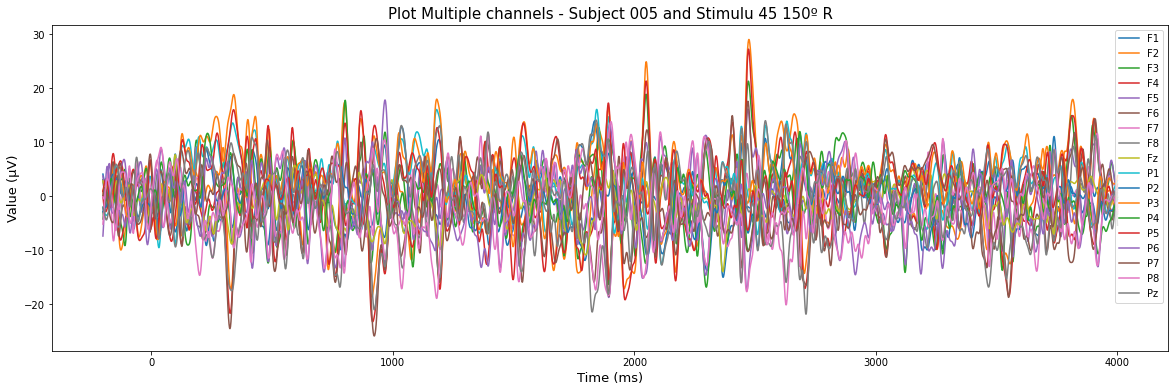

In [55]:
subject_id1 = '0005'
stimulu1 = 'Stimulus/45_150_R'

S_sample_df, raw_data = subject_trial_data(subject_id1, stimulu1, EEG_trials)
fig1 = PlotSeries.plot_2D(raw_data,'Subject 005 and Stimulu 45 150º R')
# fig1.savefig('outputs_fig/fig1_0005_s_45_150_R.png')
fig1.savefig('/content/drive/MyDrive/Colab Notebooks/PPGCC/EEG/outputs_fig_visual/fig1_0005_s_45_150_R.png')

In [56]:
# PlotSeries.plot_3dSurface_and_heatmap(S_sample_df)

##### <a id='s1_a2'>3.1.2 Amostra de dados: sujeito 5, estímulo 45 (150º, iguais)</a>

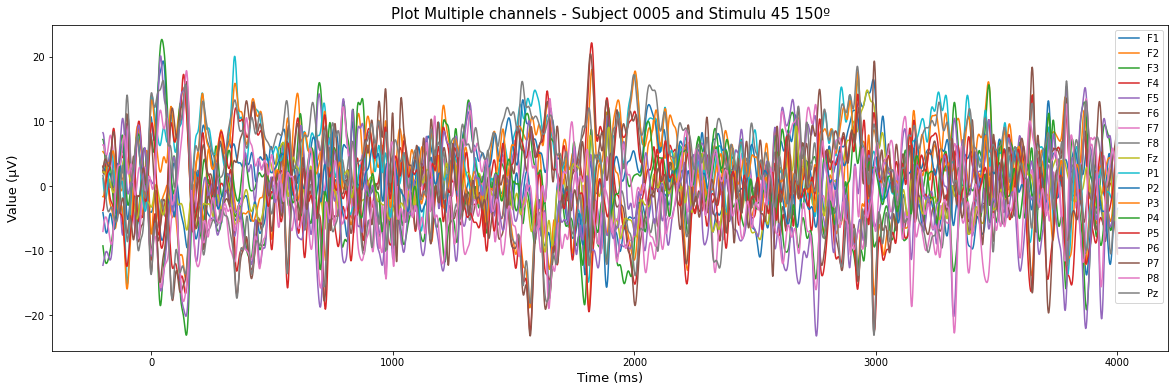

In [57]:
subject_id1 = '0005'
stimulu2 = 'Stimulus/45_150'

S_sample_df, raw_data = subject_trial_data(subject_id1, stimulu2, EEG_trials)

fig2 = PlotSeries.plot_2D(raw_data,'Subject 0005 and Stimulu 45 150º')
# fig2.savefig('outputs_fig/fig2_0005_s_45_150.png')
fig2.savefig('/content/drive/MyDrive/Colab Notebooks/PPGCC/EEG/outputs_fig_visual/fig2_0005_s_45_150.png')

In [58]:
# PlotSeries.plot_3dSurface_and_heatmap(S_sample_df)

##### <a id='s1_a3'>3.1.3 Amostra de dados: sujeito 7, estímulo 10 (0º, diferentes)</a>

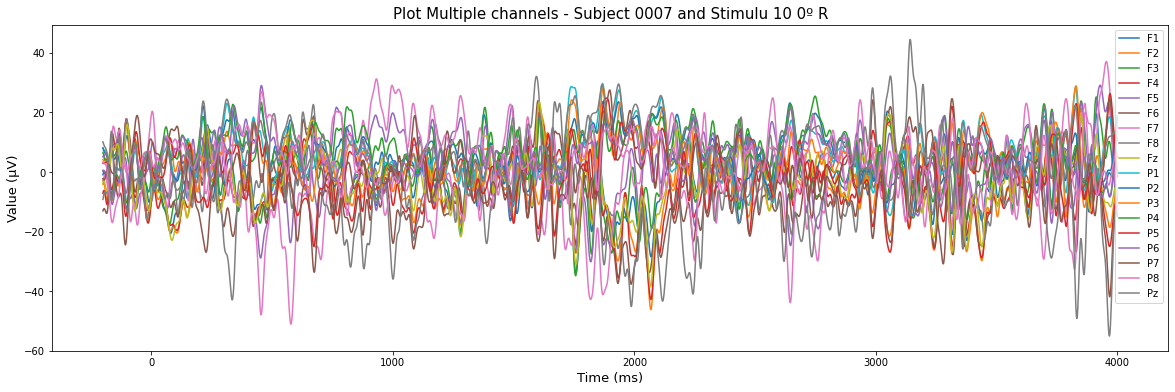

In [59]:
subject_id2 = '0007'
stimulu3 = 'Stimulus/10_0_R'

S_sample_df, raw_data = subject_trial_data(subject_id2, stimulu3, EEG_trials)
fig3 = PlotSeries.plot_2D(raw_data,'Subject 0007 and Stimulu 10 0º R')
# fig3.savefig('outputs_fig/fig3_0007_s_10_0_R.png')
fig3.savefig('/content/drive/MyDrive/Colab Notebooks/PPGCC/EEG/outputs_fig_visual/fig3_0007_s_10_0_R.png')

In [60]:
# PlotSeries.plot_3dSurface_and_heatmap(S_sample_df)

##### <a id='s1_a4'>3.1.4 Amostra de dados: sujeito 7, estímulo 10 (0º, iguais)</a>

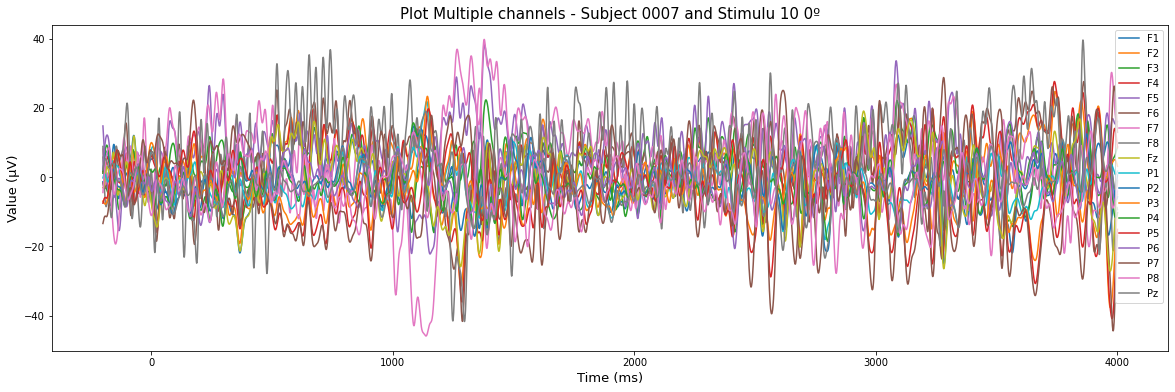

In [61]:
subject_id2 = '0007'
stimulu4 = 'Stimulus/10_0'

S_sample_df, raw_data = subject_trial_data(subject_id2, stimulu4, EEG_trials)
fig4 = PlotSeries.plot_2D(raw_data,'Subject 0007 and Stimulu 10 0º')
# fig4.savefig('outputs_fig/fig4_0007_s_10_0_R.png')
fig4.savefig('/content/drive/MyDrive/Colab Notebooks/PPGCC/EEG/outputs_fig_visual/fig4_0007_s_10_0_R.png')

In [62]:
# PlotSeries.plot_3dSurface_and_heatmap(S_sample_df)

#### <a id='s2'>3.2. Amostra de dados evocados</a>

Os dados evocados são os dados de cada um dos sujeito porém não mais separados por experimentos, o base de dados possui os mesmos campos (com excessão de `condition` e `trial`) já que foi realizado a média dos valores entre os experimentos para cada sensor em relação ao tempo (amostra).

##### <a id='s2_a1'>3.2.1 Amostra da média dos trials: sujeito 0005</a>

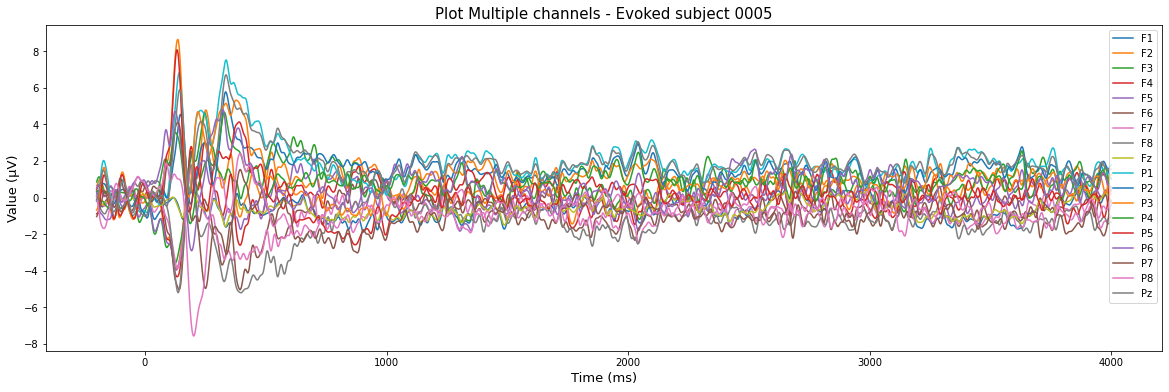

In [63]:
subject_id = '0005'
S_sample_df, raw_data = evoked_data(subject_id, EEG_evoked)
fig5 = PlotSeries.plot_2D(raw_data,'Evoked subject 0005')
# fig5.savefig('outputs_fig/fig5_0005_evoked.png')
fig5.savefig('/content/drive/MyDrive/Colab Notebooks/PPGCC/EEG/outputs_fig_visual/fig5_0005_evoked.png')

In [64]:
# PlotSeries.plot_3dSurface_and_heatmap(S_sample_df, 'evoked')

##### <a id='s2_a2'>3.2.2 Amostra das médias dos sujeitos do grupo controle por região</a>

In [65]:
sensors_left = ['F7', 'F5', 'F3', 'F1', 'P7', 'P5', 'P3', 'P1']
sensor_right = ['F8', 'F6', 'F4', 'F2', 'P8', 'P6', 'P4', 'P2']
sensor_frontal = ['F7', 'F5', 'F3', 'F1','F8', 'F6', 'F4', 'F2']
sensor_parietal = ['P7', 'P5', 'P3', 'P1', 'P8', 'P6', 'P4', 'P2']

In [66]:
control_subjects = EEG_evoked[EEG_evoked['group'] == 'control']
C_sample_df, C_data = mean_evokeds(control_subjects)

C_data_rigth = C_data[sensor_right]
C_data_left = C_data[sensors_left]
C_data_frontal = C_data[sensor_frontal]
C_data_parietal = C_data[sensor_parietal]

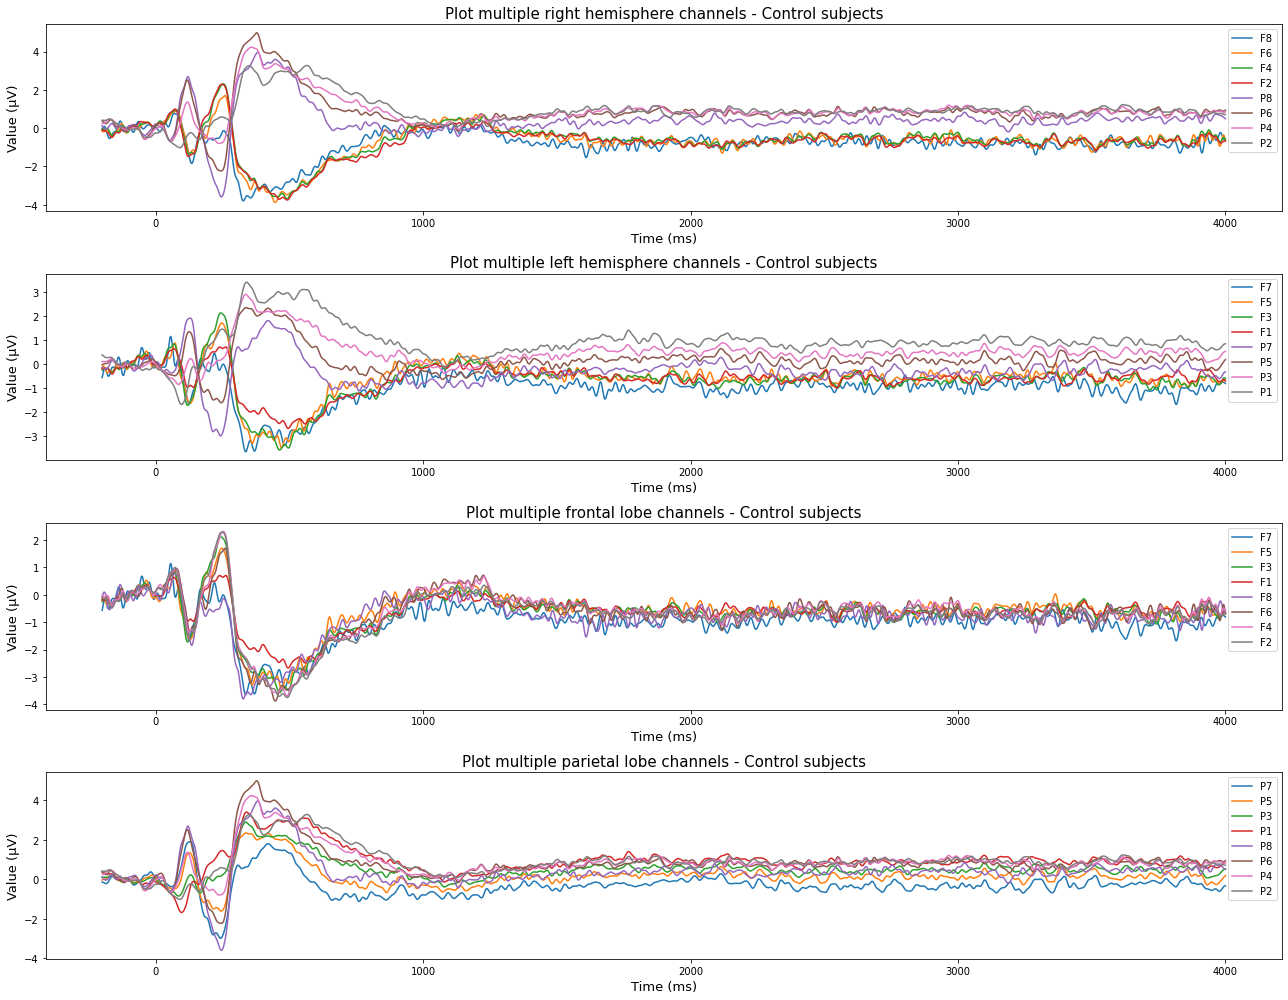

In [67]:
sp = Subplot2D(nrows=4, ncols=1)
sp.add_subplot(C_data_rigth, 1, 'Plot multiple right hemisphere channels - Control subjects')
sp.add_subplot(C_data_left, 2, 'Plot multiple left hemisphere channels - Control subjects', sharex=1)
sp.add_subplot(C_data_frontal, 3, 'Plot multiple frontal lobe channels - Control subjects', sharex=1)
sp.add_subplot(C_data_parietal, 4, 'Plot multiple parietal lobe channels - Control subjects', sharex=1)
fig6 = sp.show();
# fig6.savefig('outputs_fig/fig6_control_evoked.png')
fig6.savefig('/content/drive/MyDrive/Colab Notebooks/PPGCC/EEG/outputs_fig_visual/fig6_control_evoked.png')

##### <a id='s2_a3'>3.2.3 Amostra das médias dos sujeitos do grupo superdotado por região</a>

In [68]:
gifted_subjects = EEG_evoked[EEG_evoked['group'] == 'gifted']
G_sample_df, G_data = mean_evokeds(gifted_subjects)

G_data_rigth = G_data[sensor_right]
G_data_left = G_data[sensors_left]
G_data_frontal = G_data[sensor_frontal]
G_data_parietal = G_data[sensor_parietal]

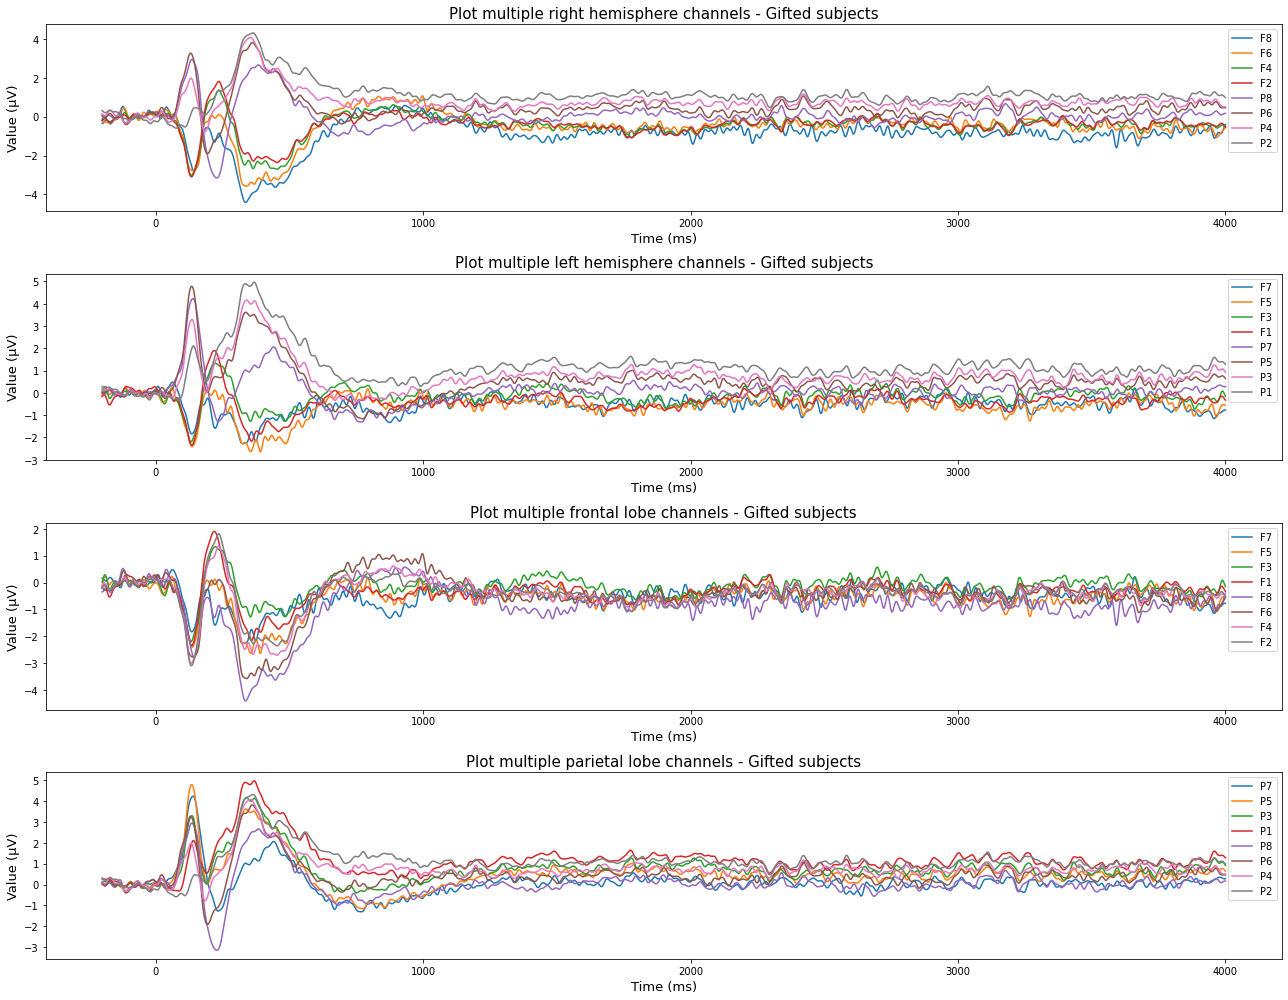

In [69]:
sp = Subplot2D(nrows=4, ncols=1)
sp.add_subplot(G_data_rigth, 1, 'Plot multiple right hemisphere channels - Gifted subjects')
sp.add_subplot(G_data_left, 2, 'Plot multiple left hemisphere channels - Gifted subjects', sharex=1)
sp.add_subplot(G_data_frontal, 3, 'Plot multiple frontal lobe channels - Gifted subjects', sharex=1)
sp.add_subplot(G_data_parietal, 4, 'Plot multiple parietal lobe channels - Gifted subjects', sharex=1)
fig7 = sp.show();
# fig7.savefig('outputs_fig/fig7_gifted_evoked.png')
fig7.savefig('/content/drive/MyDrive/Colab Notebooks/PPGCC/EEG/outputs_fig_visual/fig7_gifted_evoked.png')

#### <a id='t'>3.3. Analisando tendências e diferenças de amplitudes</a>
Análise de tendências, após remoção de ruídos que prejudicam a visualização, usando a técnica de médias móveis simples. E análise da diferenças de amplitude de cada amostra, após eliminar a tendência, usando a técnica de diferenças sucessivas.

##### <a id='t_a1'>3.3.1 Tendências para os sujeitos do grupo Controle e Superdotado</a>

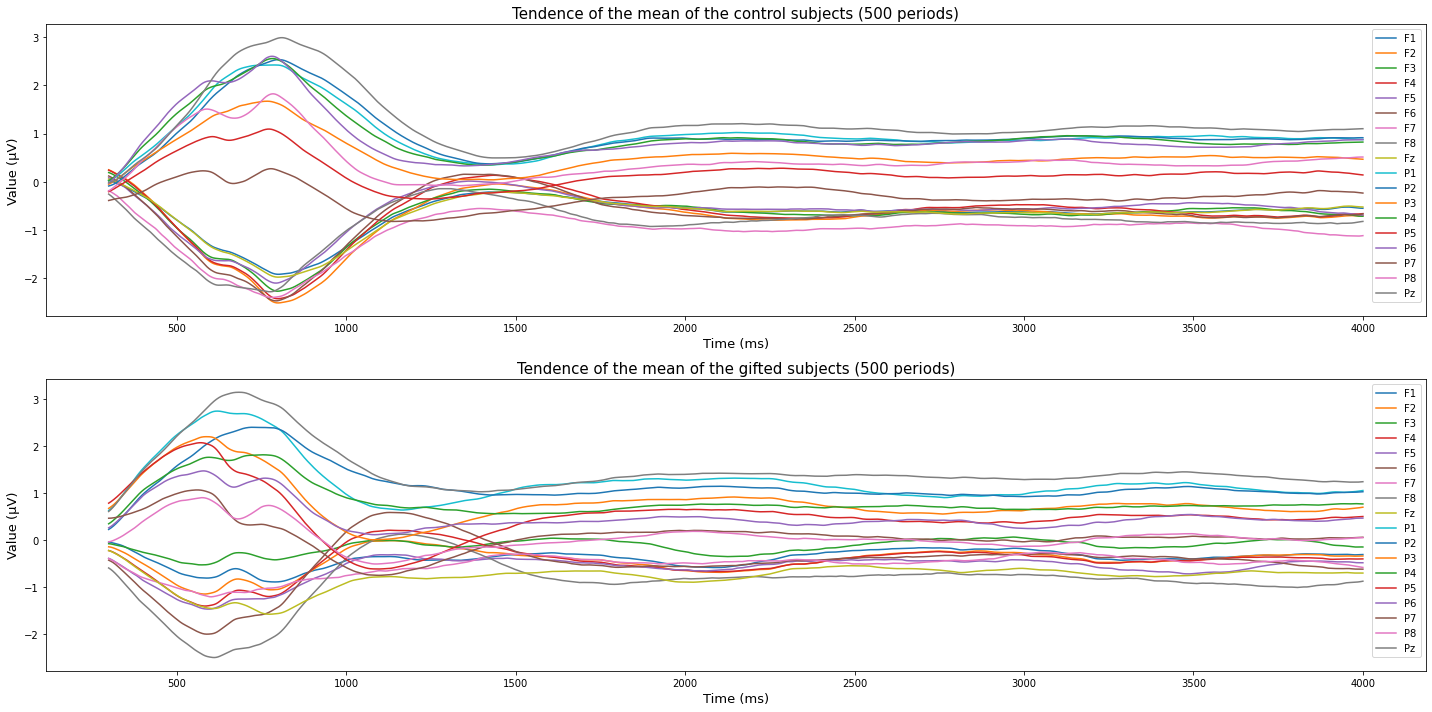

In [70]:
sp = Subplot2D(nrows=2, ncols=1, figsize=(20,10))
sp.add_subplot(C_data.rolling(500).mean(), 1, 'Tendence of the mean of the control subjects (500 periods)')
sp.add_subplot(G_data.rolling(500).mean(), 2, 'Tendence of the mean of the gifted subjects (500 periods)', sharex=1)
fig8 = sp.show();
# fig8.savefig('outputs_fig/fig8_group_tendence_mean.png')
fig8.savefig('/content/drive/MyDrive/Colab Notebooks/PPGCC/EEG/outputs_fig_visual/fig8_group_tendence_mean.png')

Todas as séries possuem tendecia linear centrada em zero, como já esperado, uma vez que estamos trabalhando com dados pré processados de eletroencefalograma. Observado crescimento da amplitude nos primeiros 300 ms após o início do estímulo, seguido do descrescimento aos 700 ms até se manter estacionário a partir dos 1500 ms (**observado como a janela de tempo associada à negatividade relacionada à rotação do ERP**), nos apresentando ainda que para o lobo frontal dos sujeitos do grupo superdotado os sinais de cada eletrodo são bem mais esparsos em relação aos do grupo controle.

##### <a id='t_a2'>3.3.2 Diferenças para os sujeitos do grupo Controle e Superdotado</a>

In [71]:
C_data_mean = C_data.mean(axis=1)
G_data_mean = G_data.mean(axis=1)
df = pd.DataFrame({'Control': C_data_mean.diff(2), 'Gifted': G_data_mean.diff(2)})

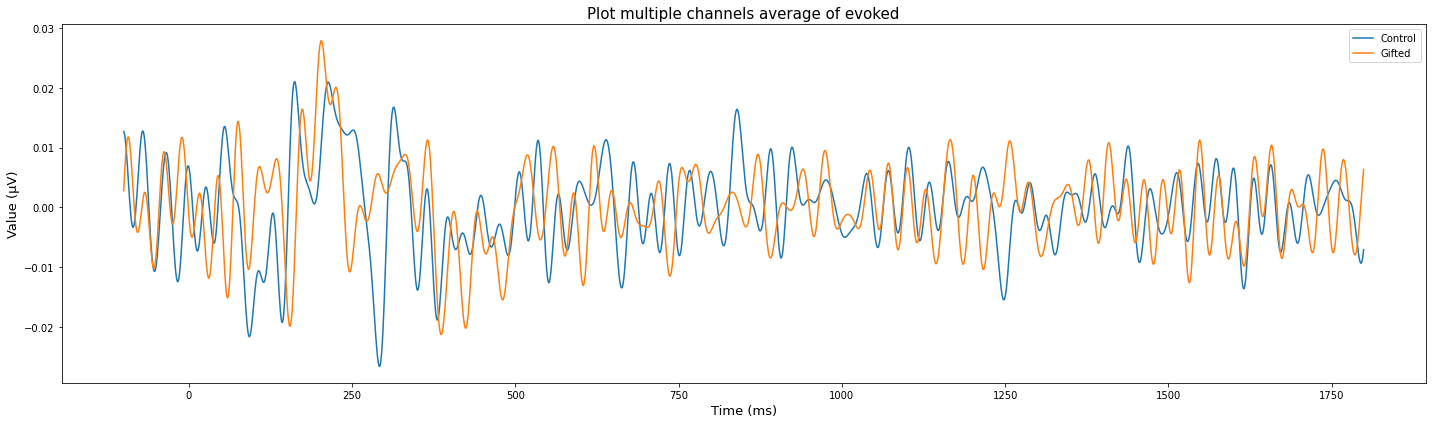

In [72]:
sp = Subplot2D(nrows=1, ncols=1, figsize=(20,6))
sp.add_subplot(df.iloc[100:2000], 1, 'Plot multiple channels average of evoked')
fig9 = sp.show();
# fig9.savefig('outputs_fig/fig9_group_difference_channel_average.png')
fig9.savefig('/content/drive/MyDrive/Colab Notebooks/PPGCC/EEG/outputs_fig_visual/fig9_group_difference_channel_average.png')

#### <a id='p'>3.4. Predizendo amostras</a>

##### <a id='p_a1'>3.4.1 Tendência e sazionalidade das médias dos sensores por amostra com os sujeitos em série por grupo</a>

In [73]:
S_control_mean = control_subjects.copy().drop(columns=['subject_id','group','time'])
S_control_mean = S_control_mean.mean(axis=1)
c_average = pd.DataFrame({'time':range(len(S_control_mean)), 'control': S_control_mean})
#c_average['time'] = pd.to_datetime(c_average['time'], unit='ms')
c_average.set_index('time', drop=True, inplace=True)

S_gifted_mean = gifted_subjects.copy().drop(columns=['subject_id','group','time'])
S_gifted_mean = S_gifted_mean.mean(axis=1)
g_average = pd.DataFrame({'time':range(len(S_gifted_mean)), 'gifted': S_gifted_mean})
g_average.set_index('time', drop=True, inplace=True)

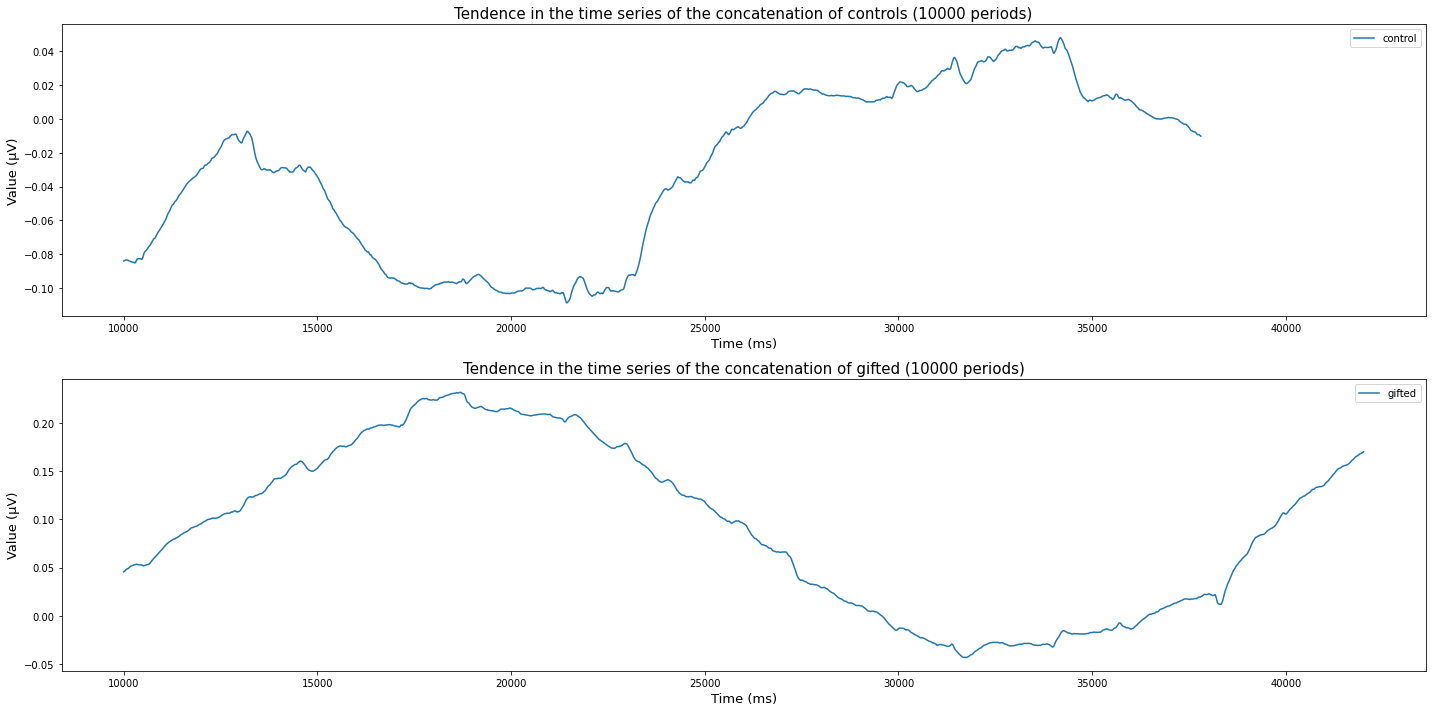

In [74]:
sp = Subplot2D(nrows=2, ncols=1, figsize=(20,10))
sp.add_subplot(c_average.rolling(10000).mean(), 1, 'Tendence in the time series of the concatenation of controls (10000 periods)')
sp.add_subplot(g_average.rolling(10000).mean(), 2, 'Tendence in the time series of the concatenation of gifted (10000 periods)', sharex=1)
fig10 = sp.show();
# fig10.savefig('outputs_fig/fig10_tendence_concatenation_subjects_gifted.png')
fig10.savefig('/content/drive/MyDrive/Colab Notebooks/PPGCC/EEG/outputs_fig_visual/fig10_tendence_concatenation_subjects_gifted.png')

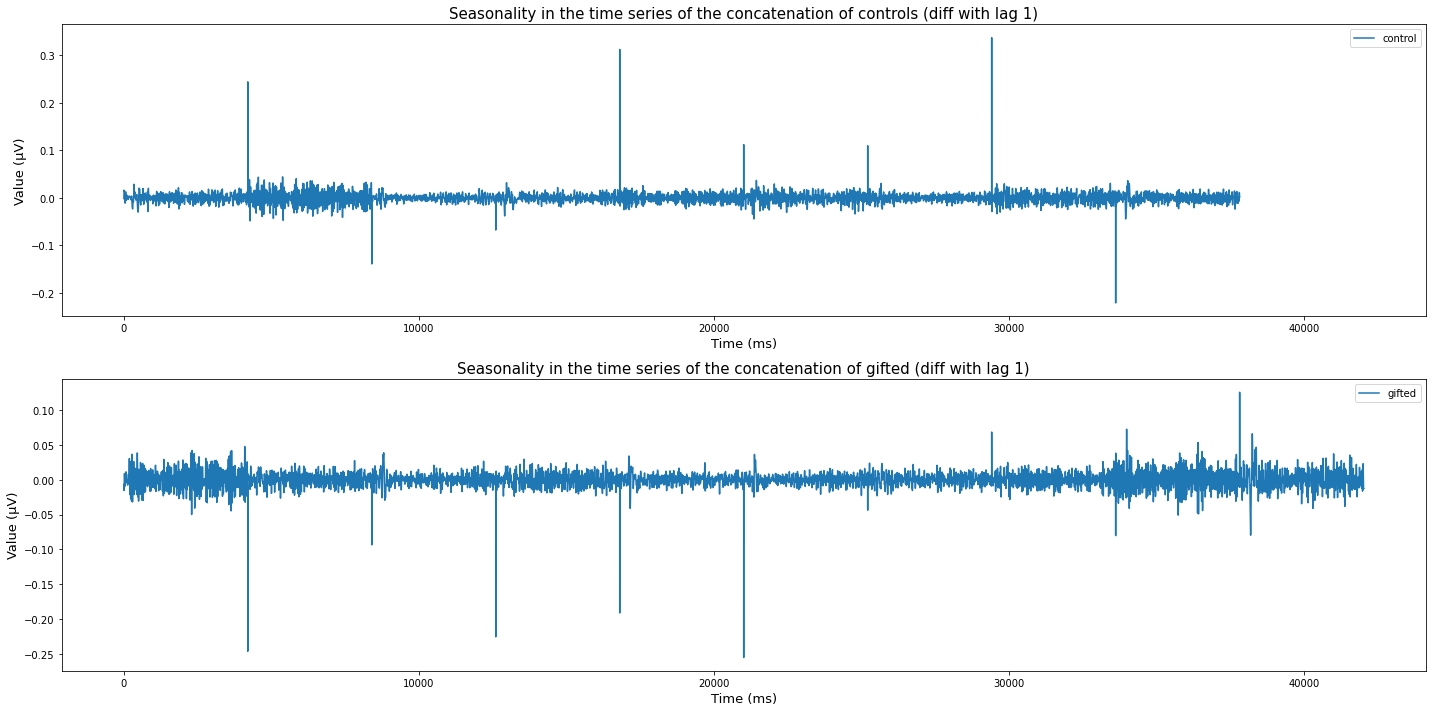

In [75]:
sp = Subplot2D(nrows=2, ncols=1, figsize=(20,10))
sp.add_subplot(c_average.diff(1), 1, 'Seasonality in the time series of the concatenation of controls (diff with lag 1)')
sp.add_subplot(g_average.diff(1), 2, 'Seasonality in the time series of the concatenation of gifted (diff with lag 1)', sharex=1)
fig11 = sp.show();
# fig11.savefig('outputs_fig/fig11_seasonality_concatenation_subjects_controls.png')
fig10.savefig('/content/drive/MyDrive/Colab Notebooks/PPGCC/EEG/outputs_fig_visual/fig11_seasonality_concatenation_subjects_controls.png')

##### <a id='p_a2'>3.4.2 Predição com MLP (DFF) na base Controle</a>

In [4]:
control_subjects = EEG_evoked[EEG_evoked['group'] == 'control'].copy()

print('Quantidade total de sujeitos no grupo: ' + str(len(control_subjects['subject_id'].unique())))

Quantidade total de sujeitos no grupo: 9


In [5]:
s_train, s_validation, s_test, mean_sensors_control = train_test_split(control_subjects, val_size=0.2, test_size=0.2)

# train_norm = data_norm(s_train['mean'].values)
# train_norm = data_norm(s_validation['mean'].values)
# test_norm = data_norm(s_test['mean'].values)
train_norm = data_norm(s_train.values, v_min=-1, v_max=1)
validation_norm = data_norm(s_validation.values, v_min=-1, v_max=1)
test_norm = data_norm(s_test.values, v_min=-1, v_max=1)

steps = 18 #4200

# x_train, y_train = split_sequence(data=train_norm, n_steps=steps)
# x_validation, y_validation = split_sequence(data=validation_norm, n_steps=steps)
# x_test, y_test = split_sequence(data=test_norm, n_steps=steps)
x_train, y_train = split_sequence(data=s_train.values, n_steps=steps)
x_validation, y_validation = split_sequence(data=s_validation.values, n_steps=steps)
x_test, y_test = split_sequence(data=s_test.values, n_steps=steps)

In [6]:
# paramns = {'batch_size': [32, 64, 128], 'epochs': [100, 200, 300], 'optimizer': ['adam', 'rmsprop']}
# model = KerasRegressor(build_fn=network_model, verbose=0)
# grid = GridSearchCV(estimator=model, param_grid=paramns, n_jobs=-1, cv=3, verbose=1)
# grid_result = grid.fit(x_train, y_train)

paramns = {'n_features':18,
           'n_neurons':18,
           'kernel_initializer':'random_uniform',
           'activation': 'relu',
           'func_loss': 'mse',
           'optimizer': 'adam',
           'metrics': 'accuracy'}

network_model = lambda: MLP(**paramns)
n_epochs = 150
mlp_regressor_control = KerasRegressor(build_fn=network_model, epochs=n_epochs, batch_size=32)

In [7]:
#ignore UserWarning
with warnings.catch_warnings():
    warnings.filterwarnings("ignore")
    
    model_control = mlp_regressor_control.fit(x_train, y_train, validation_data=(x_validation, y_validation), shuffle=False)

Epoch 1/150
919/919 [==============================] - 4s 3ms/step - loss: 0.0195 - accuracy: 0.0000e+00 - val_loss: 0.0093 - val_accuracy: 0.0000e+00
Epoch 2/150
919/919 [==============================] - 2s 3ms/step - loss: 0.0117 - accuracy: 0.0000e+00 - val_loss: 0.0076 - val_accuracy: 0.0000e+00
Epoch 3/150
919/919 [==============================] - 2s 2ms/step - loss: 0.0092 - accuracy: 0.0000e+00 - val_loss: 0.0066 - val_accuracy: 0.0000e+00
Epoch 4/150
919/919 [==============================] - 2s 3ms/step - loss: 0.0093 - accuracy: 0.0000e+00 - val_loss: 0.0096 - val_accuracy: 0.0000e+00
Epoch 5/150
919/919 [==============================] - 2s 3ms/step - loss: 0.0084 - accuracy: 0.0000e+00 - val_loss: 0.0065 - val_accuracy: 0.0000e+00
Epoch 6/150
919/919 [==============================] - 2s 3ms/step - loss: 0.0090 - accuracy: 0.0000e+00 - val_loss: 0.0109 - val_accuracy: 0.0000e+00
Epoch 7/150
919/919 [==============================] - 2s 3ms/step - loss: 0.0087 - accuracy: 

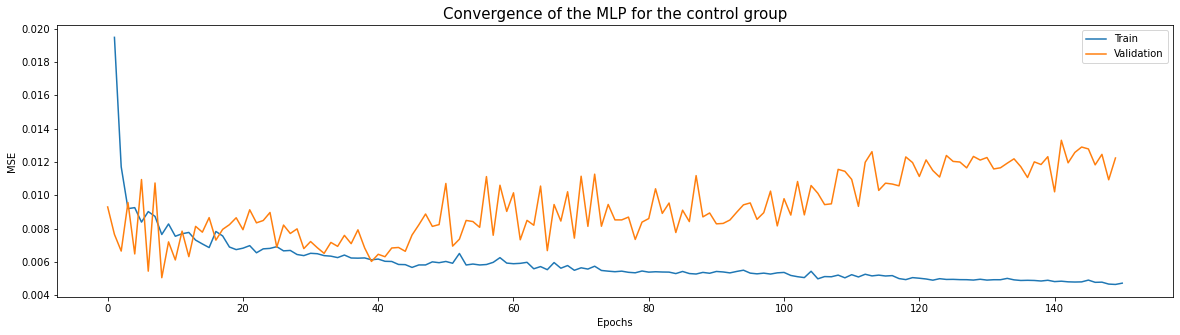

In [8]:
plt.figure(figsize=(20,5))
x = np.arange(1, len(model_control.history_['loss']) + 1)
plt.plot(x, model_control.history_['loss'], label='Train')
plt.plot(model_control.history_['val_loss'], label='Validation')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.title('Convergence of the MLP for the control group',fontsize=15)
plt.legend()
plt.savefig(f'outputs_fig/fig12_convergence_150_mse_mlp_regressor_control.png')
# plt.savefig('/content/drive/MyDrive/Colab Notebooks/PPGCC/EEG/outputs_fig_visual/fig12_convergence_150_mse_mlp_regressor_control.png')

In [9]:
pred_control = mlp_regressor_control.predict(x_test)
# print('RMSE: ' + str(RMSE(y_test, pred_control)))
# print('MAE: ' + str(MAE(y_test, pred_control)))
# print('MAPE: ' + str(MAPE(y_test, pred_control)))

rmse = np.sqrt(mean_squared_error(y_test, pred_control))
mae = mean_absolute_error(y_test, pred_control)
mape = mean_absolute_percentage_error(y_test, pred_control)
print(f'Métricas de validação no grupo Controle')
print(f'RMSE: {rmse:.5f}')
print(f'MAE:  {mae:.5f}')
print(f'MAPE: {mape:.2f}%')

132/132 [==============================] - 0s 2ms/step
Métricas de validação no grupo Controle
RMSE: 0.13166
MAE:  0.07938
MAPE: 17.28%


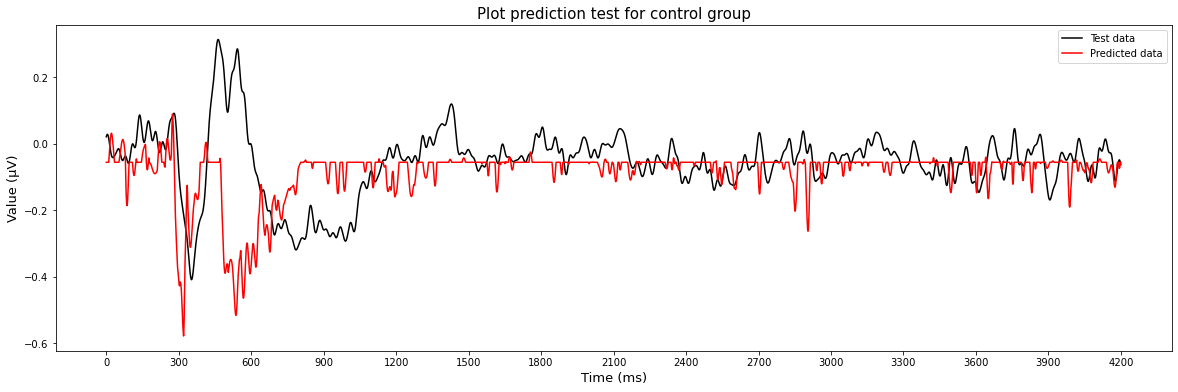

In [10]:
plt.figure(figsize=(20,6))
plt.plot(y_test, 'k', label='Test data')
plt.plot(pred_control, 'r', label='Predicted data')
plt.xticks(np.arange(0, len(y_test), step=300))
plt.legend()
plt.title("Plot prediction test for control group",fontsize=15)
plt.xlabel("Time (ms)",fontsize=13)
# plt.ylabel("Normalized value",fontsize=13)
plt.ylabel("Value (µV)",fontsize=13)
plt.savefig(f'outputs_fig/fig13_prediction_test_control.png')
# plt.savefig('/content/drive/MyDrive/Colab Notebooks/PPGCC/EEG/outputs_fig_visual/fig13_prediction_test_control.png')

##### <a id='p_a3'>3.4.3 Predição com MLP (DFF) na base Superdotados</a>

In [11]:
gifted_subjects = EEG_evoked[EEG_evoked['group'] == 'gifted'].copy()
s_classify = [gifted_subjects['subject_id'].unique()[-1]]
gifted_subjects = gifted_subjects[~gifted_subjects['subject_id'].isin(s_classify)]

print('Quantidade total de sujeitos no grupo: ' + str(len(gifted_subjects['subject_id'].unique())))

Quantidade total de sujeitos no grupo: 9


In [12]:
s_train, s_validation, s_test, mean_sensors_gifted = train_test_split(gifted_subjects, val_size=0.2, test_size=0.2)

# train_norm = data_norm(s_train['mean'].values)
# train_norm = data_norm(s_validation['mean'].values)
# test_norm = data_norm(s_test['mean'].values)
train_norm = data_norm(s_train.values, v_min=-1, v_max=1)
validation_norm = data_norm(s_validation.values, v_min=-1, v_max=1)
test_norm = data_norm(s_test.values, v_min=-1, v_max=1)

steps = 18 #4200

# x_train, y_train = split_sequence(data=train_norm, n_steps=steps)
# x_validation, y_validation = split_sequence(data=validation_norm, n_steps=steps)
# x_test, y_test = split_sequence(data=test_norm, n_steps=steps)
x_train, y_train = split_sequence(data=s_train.values, n_steps=steps)
x_validation, y_validation = split_sequence(data=s_validation.values, n_steps=steps)
x_test, y_test = split_sequence(data=s_test.values, n_steps=steps)

In [13]:
# paramns = {'batch_size': [32, 64, 128], 'epochs': [100, 200, 300], 'optimizer': ['adam', 'rmsprop']}
# model = KerasRegressor(build_fn=network_model, verbose=0)
# grid = GridSearchCV(estimator=model, param_grid=paramns, n_jobs=-1, cv=3, verbose=1)
# grid_result = grid.fit(x_train, y_train)

paramns = {'n_features':18,
           'n_neurons':18,
           'kernel_initializer':'random_uniform',
           'activation': 'relu',
           'func_loss': 'mse',
           'optimizer': 'adam',
           'metrics': 'accuracy'}

network_model = lambda: MLP(**paramns)
n_epochs = 150
mlp_regressor_gifted = KerasRegressor(build_fn=network_model, epochs=n_epochs, batch_size=32)

In [14]:
#ignore UserWarning
with warnings.catch_warnings():
    warnings.filterwarnings("ignore")
    
    model_gifted = mlp_regressor_gifted.fit(x_train, y_train, validation_data=(x_validation, y_validation), shuffle=False)

Epoch 1/150
919/919 [==============================] - 3s 3ms/step - loss: 0.0173 - accuracy: 0.0000e+00 - val_loss: 0.0262 - val_accuracy: 0.0000e+00
Epoch 2/150
919/919 [==============================] - 2s 2ms/step - loss: 0.0100 - accuracy: 0.0000e+00 - val_loss: 0.0140 - val_accuracy: 0.0000e+00
Epoch 3/150
919/919 [==============================] - 2s 3ms/step - loss: 0.0090 - accuracy: 0.0000e+00 - val_loss: 0.0217 - val_accuracy: 0.0000e+00
Epoch 4/150
919/919 [==============================] - 2s 3ms/step - loss: 0.0083 - accuracy: 0.0000e+00 - val_loss: 0.0197 - val_accuracy: 0.0000e+00
Epoch 5/150
919/919 [==============================] - 2s 3ms/step - loss: 0.0079 - accuracy: 0.0000e+00 - val_loss: 0.0181 - val_accuracy: 0.0000e+00
Epoch 6/150
919/919 [==============================] - 2s 2ms/step - loss: 0.0075 - accuracy: 0.0000e+00 - val_loss: 0.0171 - val_accuracy: 0.0000e+00
Epoch 7/150
919/919 [==============================] - 2s 2ms/step - loss: 0.0072 - accuracy: 

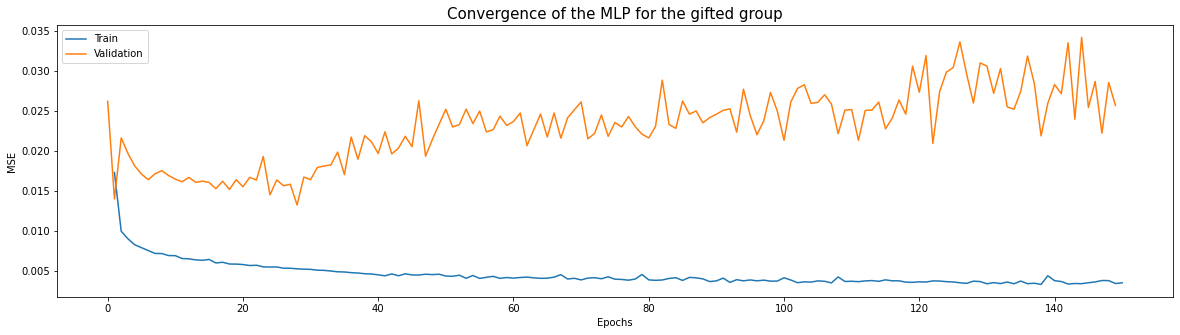

In [15]:
plt.figure(figsize=(20,5))
x = np.arange(1, len(model_gifted.history_['loss']) + 1)
plt.plot(x, model_gifted.history_['loss'], label='Train')
plt.plot(model_gifted.history_['val_loss'], label='Validation')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.title('Convergence of the MLP for the gifted group',fontsize=15)
plt.legend()
plt.savefig(f'outputs_fig/fig14_convergence_150_mse_mlp_regressor_gifted.png')
# plt.savefig('/content/drive/MyDrive/Colab Notebooks/PPGCC/EEG/outputs_fig_visual/fig14_convergence_150_mse_mlp_regressor_gifted.png')

In [16]:
pred_gifted = mlp_regressor_gifted.predict(x_test)

rmse = np.sqrt(mean_squared_error(y_test, pred_gifted))
mae = mean_absolute_error(y_test, pred_gifted)
mape = mean_absolute_percentage_error(y_test, pred_gifted)
print(f'Métricas de validação no grupo Superdotado')
print(f'RMSE: {rmse:.5f}')
print(f'MAE:  {mae:.5f}')
print(f'MAPE: {mape:.2f}%')

132/132 [==============================] - 0s 2ms/step
Métricas de validação no grupo Superdotado
RMSE: 0.26221
MAE:  0.16737
MAPE: 16.97%


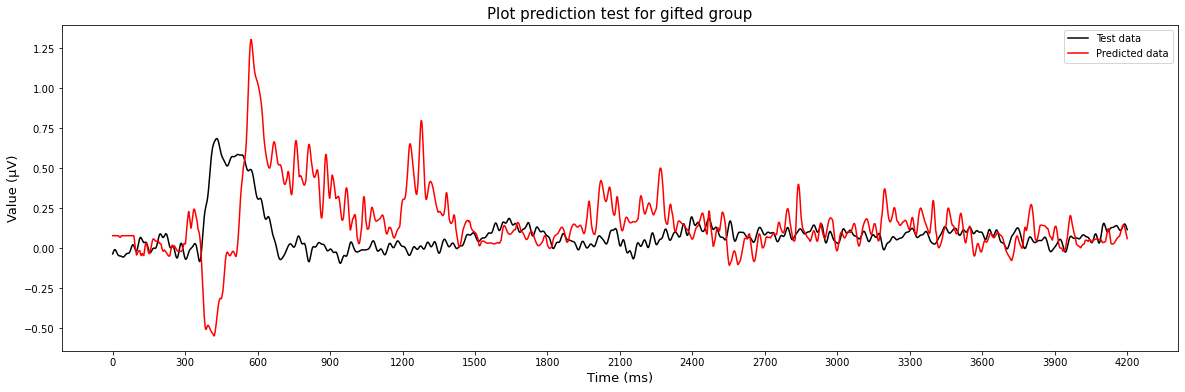

In [17]:
plt.figure(figsize=(20,6))
plt.plot(y_test, 'k', label='Test data')
plt.plot(pred_gifted, 'r', label='Predicted data')
plt.xticks(np.arange(0, len(y_test), step=300))
plt.legend()
plt.title("Plot prediction test for gifted group",fontsize=15)
plt.xlabel("Time (ms)",fontsize=13)
# plt.ylabel("Normalized value",fontsize=13)
plt.ylabel("Value (µV)",fontsize=13)
plt.savefig(f'outputs_fig/fig15_prediction_test_gifted.png')
# plt.savefig('/content/drive/MyDrive/Colab Notebooks/PPGCC/EEG/outputs_fig_visual/fig15_prediction_test_gifted.png')

##### <a id='p_a4'>3.4.4 Classificação a partir das predições anteriores (MLP - DFF)</a>

In [18]:
df_s_classify = EEG_evoked[(EEG_evoked['group'] == 'gifted') & (EEG_evoked['subject_id'].isin(s_classify))].copy()

mean_sensor = df_s_classify[df_s_classify.columns[3:]].mean(axis=1).reset_index(drop=True)
df_s_classify['mean'] = mean_sensor.values

x_pred, y_pred = split_sequence(data=df_s_classify[df_s_classify.columns[3:]].values, n_steps=steps)

In [19]:
pred_control = mlp_regressor_control.predict(x_pred)
pred_gifted = mlp_regressor_gifted.predict(x_pred)

rmse = np.sqrt(mean_squared_error(mean_sensors_control, pred_control))
mae = mean_absolute_error(mean_sensors_control, pred_control)
mape = mean_absolute_percentage_error(mean_sensors_control, pred_control)
metrics = [[rmse, mae, mape]]

rmse = np.sqrt(mean_squared_error(mean_sensors_gifted, pred_gifted))
mae = mean_absolute_error(mean_sensors_gifted, pred_gifted)
mape = mean_absolute_percentage_error(mean_sensors_gifted, pred_gifted)
metrics += [[rmse, mae, mape]]
metrics

132/132 [==============================] - 0s 2ms/step


[[0.10166967962475792, 0.0674213792302215, 12.72362685304638],
 [0.11364270728717236, 0.0625258929573439, 4.9558187096145305]]

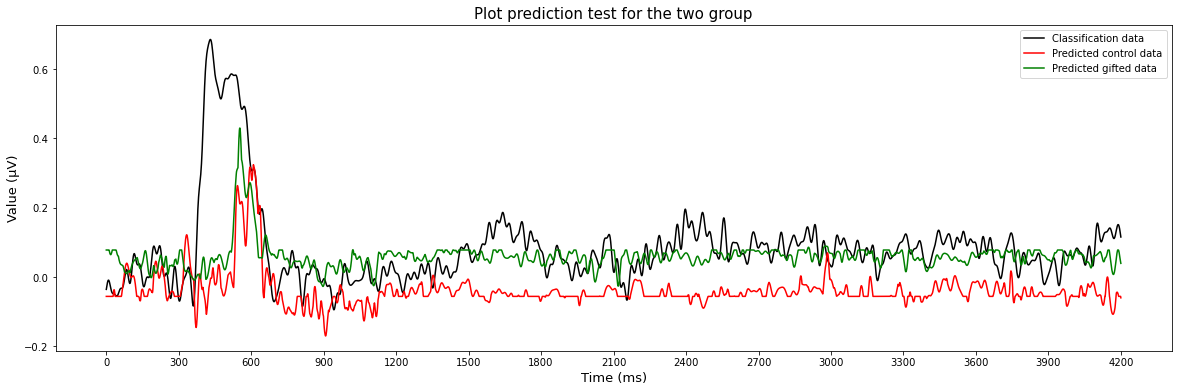

In [20]:
plt.figure(figsize=(20,6))
plt.plot(y_test, 'k', label='Classification data')
plt.plot(pred_control, 'r', label='Predicted control data')
plt.plot(pred_gifted, 'g', label='Predicted gifted data')
plt.xticks(np.arange(0, len(y_test), step=300))
plt.legend()
plt.title("Plot prediction test for the two group",fontsize=15)
plt.xlabel("Time (ms)",fontsize=13)
# plt.ylabel("Normalized value",fontsize=13)
plt.ylabel("Value (µV)",fontsize=13)
plt.savefig(f'outputs_fig/fig16_prediction_test_two_group.png')
# plt.savefig('/content/drive/MyDrive/Colab Notebooks/PPGCC/EEG/outputs_fig_visual/fig16_prediction_test_two_group.png')

In [21]:
#menor RMSE
if metrics[0][0] < metrics[1][0]:
    print('Sujeito classificado como do grupo Controle')
else:
    print('Sujeito classificado como do grupo Superdotado')

Sujeito classificado como do grupo Controle
